In [1]:
import ee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
# Initialize the GEE
ee.Initialize()

print("Initialized")

Initialized


    id longitude latitude precipitation
1    0   85.6768  26.8372        10.906
2    1   85.6768  26.8372       41.7448
3    2   85.6768  26.8372       25.0036
4    3   85.6768  26.8372       63.2315
5    4   85.6768  26.8372       64.4566
6    5   85.6768  26.8372       155.105
7    6   85.6768  26.8372       485.068
8    7   85.6768  26.8372       196.471
9    8   85.6768  26.8372       378.793
10   9   85.6768  26.8372       22.0735
11  10   85.6768  26.8372       4.30373
12  11   85.6768  26.8372       11.4885


NameError: name 'January' is not defined

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


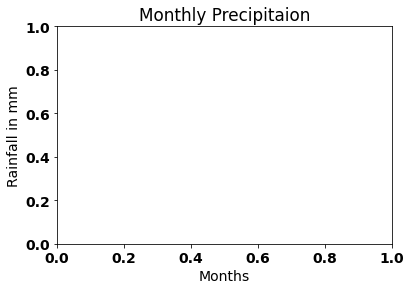

In [2]:
# import the RS products
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD')
 
# Define time range
startyear = 2019
endyear = 2020

# Set date in ee date format
startdate = ee.Date.fromYMD(startyear,1,1)
enddate = ee.Date.fromYMD(endyear+1,12,31)

 
# create list for years
years = range(startyear,endyear);
 
# make a list with months
months = range(1,13)

#Filter to select Precipitation band
PrecipitationChirps = chirps.filterDate(startdate, enddate).sort('system:time_start', False).select("precipitation")
 
# Define geograpic domain
point = ee.Geometry.Point([85.68, 26.91])
 
# calculate the monthly mean
def MonthlyMean(imageCollection):
    mylist = ee.List([])
    for y in years:
        for m in months:
            w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).sum()
            #mylist = mylist.add(w)
            mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
    return ee.ImageCollection.fromImages(mylist)
 
# run the calcMonthlyMean function
monthlyChirps = ee.ImageCollection(MonthlyMean(PrecipitationChirps))


# select the region of interest, 25000 is the cellsize in meters
monthlyChirps = monthlyChirps.getRegion(point,25000,"epsg:4326").getInfo()


# get january (index = 0)
precipiation = pd.DataFrame(monthlyChirps, columns = monthlyChirps[0])


# remove the first line
precipiation = precipiation[1:]

#to display the data
print(precipiation[['id','longitude','latitude','precipitation']])


#To export to CSV
precipiation.to_csv (r'C:\bikesh\Code\GEE\mywork\Chirps\precipitation.csv', index = False, header=True)


# To display the data in the chart
#style the font size
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

#chart Title
plt.title('Monthly Precipitaion')

#chart lable for x axis
plt.xlabel('Months')

#chart lable for y axis
plt.ylabel('Rainfall in mm')

#chart size and data assign
plt.bar(January['id'], January['precipitation'], color='#fa4b2a')
plt.rcParams["figure.figsize"] = (10,7)

#export chart as png
plt.savefig('precipitation.png')


